# **Capstone Project: E-Commerce Review Insights by Nicholas Zhang**

# **Introduction and Problem Framing**
## **I. Project Motivation**
*   E-commerce platforms rely heavily on customer reviews to build trust and improve sales
*   Manual review analysis does not scale
*   Just looking at ratings hides nuances of reviews (same rating but with different sentiment)
*   Businesses want automated insights from reviews

## **II. Project Objectives**
*   Understanding product sentiment based on customer reviews using NLP
*   Predicting product ratings based on review content using ML models
*   Summarizing customer reviews to provide concise insights for buyers
*   Use deep learning to identify review patterns to detect anomalies in ratings or sentiment trends
*   Create an interactive summarization tool for users

## **III. Dataset Description**
*   This project uses real-world e-commerce reviews from Amazon that has both structured and unstructured data
*   Dataset is great for NLP, ML, and DL applications
*   The dataset has 1,465 product reviews with different product categories, prices, rating, and customer feedback
*   The structured data will be used for statistical analysis, feature engineering, and modeling
*   The unstructured data will be used for NLP tasks like sentiment analysis and summarization

**Structured Data**
| Column Name | Description |
|---|---|
| product_id | Unique identifier for the product |
| product_name | Name of the product |
| category | Product category (e.g., Electronics, Accessories, Cables) |
| discounted_price | Discounted price of the product |
| actual_price | Original price of the product |
| discount_percentage | Percentage discount applied |
| rating | Overall product rating (1–5 scale) |
| rating_count | Number of users who rated the product |
| user_id | Unique identifier for the reviewer |
| user_name | Name of the reviewer |
| review_id | Unique identifier for the review |
| review_title | Short title of the review |
| img_link | Image URL of the product |
| product_link | Product URL on the e-commerce platform |

**Unstructured Data**
| Column Name | Description |
|---|---|
| about_product | Description of product features |
| review_content | Full-text reviews written by customers |

## **IV. Methodology and Roadmap**
This project will follow an end-to-end machine learning workflow:
*   Data Preprocessing and EDA
*   Feature Engineering and Predictive Modeling
*   Deep Learning and NLP for Review Analysis
*   LLM Integration and Deployment via Web Interface

# **1. Data Preprocessing and EDA**

## **1.1 Load and Explore the Dataset**
*   Imported pandas to read in the file
*   Loaded in the csv and used 'head' function to make sure it loaded correctly
*   Used the 'shape' function to see what the dataset looks like. It has 1,465 reviews and 16 columns
*   Used the 'info' function to inspect the datatypes and null counts. All the columns are currently 'object', some columns will need to be updated to numerical. There are also 2 nulls in 'rating_count' that I will try to resolve.
*   Found the value counts for the 'category' column, and we can see the most common category is Computers & Accessories
*   Displayed the value counts for the 'rating' column to make sure there wasn't anything glaring. There is one record with a pipe character that can be fixed.

In [1]:
import pandas as pd

df = pd.read_csv('/content/amazon.csv')

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [2]:
df.shape

(1465, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
df['category'].value_counts().head()

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


In [5]:
df['rating'].value_counts().sort_index()

,count
rating,
2,1
2.3,1
2.6,1
2.8,2
2.9,1
3,1
3.0,3
3.1,4
3.2,2


## **1.2 Data Cleaning**
*   Created a copy of the df for cleaning to maintain the original df. Displayed the first few records to determine the columns that need some cleaning.
*   For 'discounted_price' and 'actual_price', I converted them to string, then removed the '₹' symbol and commas, and finally formatted them as floats
*   For 'discounted_percentage', I did the same but removed the '%' symbol
*   For 'rating', I cleaned any extra symbols and extracted the numbers to a clean format
*   For 'rating_count', I did the same but removed only the commas
*   Ran 'info' function make sure all these numeric columns were converted to floats

In [6]:
cleaned_df = df.copy()
cleaned_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
cleaned_df['discounted_price'] = (
    cleaned_df['discounted_price'].astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float))

cleaned_df['actual_price'] = (
    cleaned_df['actual_price'].astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float))

cleaned_df['discount_percentage'] = (
    cleaned_df['discount_percentage'].astype(str)
    .str.replace('%', '', regex=False)
    .astype(float))

cleaned_df['rating'] = (
    cleaned_df['rating']
    .astype(str)
    .str.extract(r'(\d+(\.\d+)?)')[0]
    .astype(float))

cleaned_df['rating_count'] = (
    cleaned_df['rating_count'].astype(str)
    .str.replace(',', '', regex=False)
    .astype(float))

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

## **1.3 Handling Missing Values**
*   From the previous step, we can see there is 1 record with a missing 'rating' and 2 records with a missing 'rating_count'
*   For the 1 missing 'rating' record, I decided to drop it because it is a target variable, and I didn't want to impute or fill it with anything
*   For the 2 missing 'rating_count' records, I filled wtih 0 because it could be meaningful to the model that a product or seller has no previous rating
*   Even though there are no current missing/NAs for 'review_content' and 'discount_percentage', I wanted to clean these to future proof the data cleaning process
*   For 'review_content', I dropped anything missing because you can't run NLP tasks on blank reviews
*   For 'discount_percentage', I imputed with the median because it is a numeric feature for the model, and we don't want to drop those records

In [8]:
cleaned_df = cleaned_df.dropna(subset=['rating'])

cleaned_df['rating_count'] = cleaned_df['rating_count'].fillna(0)

cleaned_df = cleaned_df.dropna(subset=['review_content'])

cleaned_df['discount_percentage'] = cleaned_df['discount_percentage'].fillna(cleaned_df['discount_percentage'].median())

In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1464 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   object

## **1.4 Text Cleaning**
*   Imported and downloaded the necessary libraries and packages for text cleaning
*   Created a 'preprocessing' function that cleans the text by making it lowercase, removing HTML tags, URLs, special characters, extra spaces, stop words
*   Tokenized and lemmatized the cleaned text and removed words that were 2 or less characters
*   Applied the function to 'review_content' and looked at the first 5 records to make sure it ran correctly

In [10]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    text = text.lower() # lowercase
    text = re.sub(r'<.*?>', ' ', text) # removes the HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text) # removes URLs
    text = re.sub(r'[^a-z\s]', ' ', text) # removes special characters
    text = re.sub(r'\s+', ' ', text).strip() # removes extra spaces from the previous steps

    stop_words = set(stopwords.words('english')) # sets the stop words
    lemmatizer = WordNetLemmatizer() # initialized the lemmatizer

    tokens = word_tokenize(text) # tokenize the text
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2 # removes the stop words and really short words
    ]

    return ' '.join(tokens) # joins back with cleaned text

In [12]:
cleaned_df['clean_review_content'] = cleaned_df['review_content'].apply(preprocessing)
cleaned_df[['review_content', 'clean_review_content']].head()

,review_content,clean_review_content
0,Looks durable Charging is fine tooNo complains...,look durable charging fine toono complains cha...
1,I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...
2,"Not quite durable and sturdy,https://m.media-a...",quite durable sturdy good nice product working...
3,"Good product,long wire,Charges good,Nice,I bou...",good product long wire charge good nice bought...
4,"Bought this instead of original apple, does th...",bought instead original apple work fast apple ...


## **1.5 EDA**
*   Now that all the data is clean, we are ready to conduct an EDA on numerical and categorical variables




### **1.5.1 Numerical Columns**
*   We will first look at the numerical columns, so I computed some summary statistics for the 5 numerical columns
*   Rating: The mean and median are 4.1 which means the dataset has consistently high ratings
*   Discount %: The median is 50% discount, with half of products having between 32% and 63% discount.
*   Discounted and Actual Price: The discounted price at 25th, 50th, and 75th percentile are all slightly less than half of the actual price, which is line with what we would expect with the discount %.
*   Rating Count: Half of the dataset falls between 1,179 and 17,330 ratings, which means consumers are significantly more likely to buy products with a lot of ratings.
*   In addition to summary statistics, I wanted to see some of the distributions for these columns

In [13]:
eda_num_cols = ['rating', 'discount_percentage', 'discounted_price', 'actual_price', 'rating_count']

cleaned_df[eda_num_cols].describe()

,rating,discount_percentage,discounted_price,actual_price,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,4.096585,47.713115,3126.011906,5447.002923,18282.366803
std,0.291674,21.627422,6946.625442,10878.270001,42742.207636
min,2.000000,0.000000,39.000000,39.000000,0.000000
25%,4.000000,32.000000,323.750000,800.000000,1179.000000
50%,4.100000,50.000000,799.000000,1650.000000,5178.500000
75%,4.300000,63.000000,1999.000000,4303.750000,17330.750000
max,5.000000,94.000000,77990.000000,139900.000000,426973.000000


**Product Ratings**
*   Imported matplotlib and numpy to show distributions
*   The vast majority of ratings are centered around 4, which we knew from the summary statistics
*   Created 4 buckets to group the ratings for a different view
*   Bucketed and labeled all records and displayed the distributions
*   The majority of reviews are in the 4.0-4.5 score bucket, and not many have <3.5 or >4.5 ratings

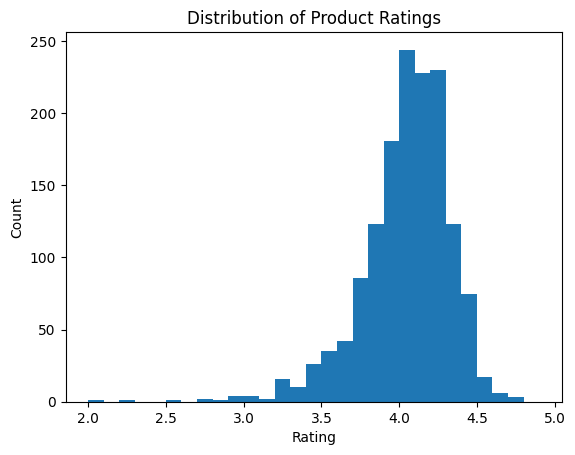

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.hist(cleaned_df['rating'], bins=np.arange(2.0, 5.0, 0.1))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Product Ratings')
plt.show()

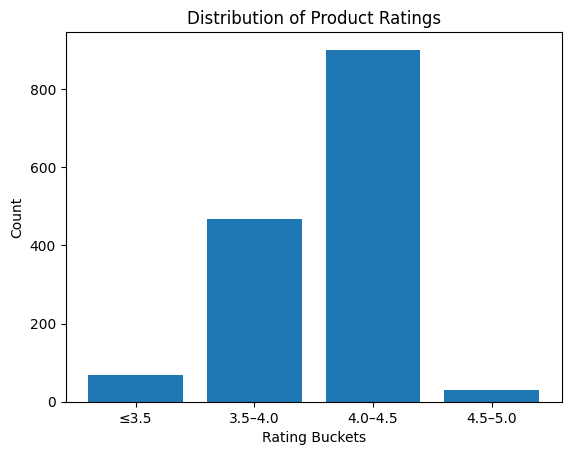

In [15]:
eda_df = cleaned_df[eda_num_cols].copy()
bins = [0, 3.5, 4.0, 4.5, 5.0]
labels = ['≤3.5', '3.5–4.0', '4.0–4.5', '4.5–5.0']

eda_df['rating_bucket'] = pd.cut(
    eda_df['rating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

rating_dist = (eda_df['rating_bucket'].value_counts().sort_index().reset_index())
rating_dist.columns = ['rating_bucket', 'count']

plt.figure()
plt.bar(rating_dist['rating_bucket'], rating_dist['count'])
plt.xlabel('Rating Buckets')
plt.ylabel('Count')
plt.title('Distribution of Product Ratings')
plt.show()

**Discount Percentage**
*   Created 4 buckets to group the discount percentages
*   The majority of discounts percentages are in the 25-50% and 50-75% buckets, and there are slightly more discount percentages <25% than >75%

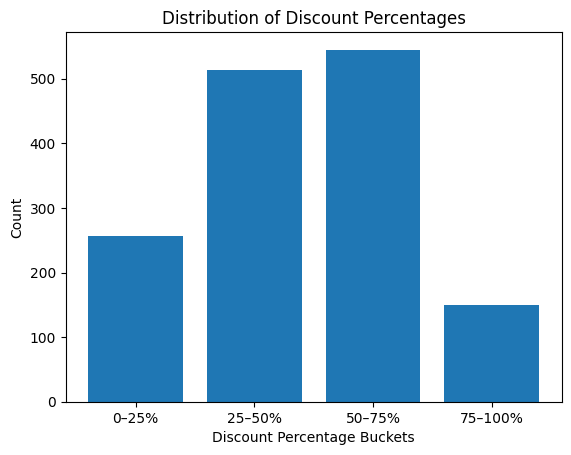

In [16]:
bins_discount = [0, 25, 50, 75, 100]
labels_discount = ['0–25%', '25–50%', '50–75%', '75–100%']

eda_df['discount_bucket'] = pd.cut(
    eda_df['discount_percentage'],
    bins=bins_discount,
    labels=labels_discount,
    include_lowest=True
)

discount_dist = (eda_df['discount_bucket'].value_counts().sort_index().reset_index())
discount_dist.columns = ['discount_bucket', 'count']

plt.figure()
plt.bar(discount_dist['discount_bucket'], discount_dist['count'])
plt.xlabel('Discount Percentage Buckets')
plt.ylabel('Count')
plt.title('Distribution of Discount Percentages')
plt.show()

**Actual and Discounted Prices**
*   Created 7 buckets to group both prices
*   High distributions for the 500-1k, 1k-2k, and 2k-5k buckets
*   There are not too many high priced products in the 10k-20k and 20k+ buckets
*   For the discounted prices, we can see a massive shift to the left for the distribution, with the largest bucket by far being in the <500 bucket. Sellers are likely discounting to be below 500 to meet customer filtering when making purchases

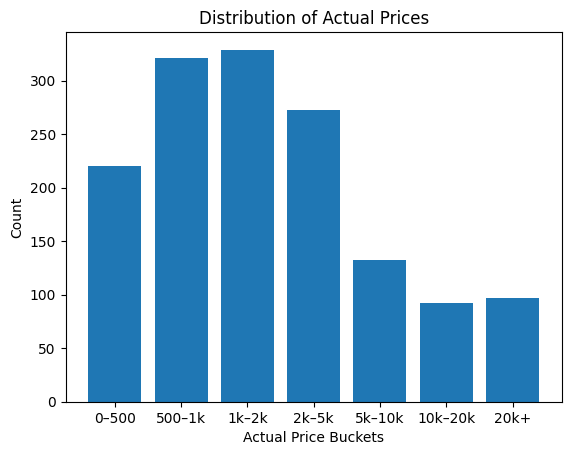

In [17]:
bins_price = [0, 500, 1000, 2000, 5000, 10000, 20000, float('inf')]
labels_price = ['0–500', '500–1k', '1k–2k', '2k–5k', '5k–10k', '10k–20k', '20k+']

eda_df['price_bucket'] = pd.cut(
    eda_df['actual_price'],
    bins=bins_price,
    labels=labels_price,
    include_lowest=True
)

price_dist = (eda_df['price_bucket'].value_counts().sort_index().reset_index())

price_dist.columns = ['price_bucket', 'count']

plt.figure()
plt.bar(price_dist['price_bucket'], price_dist['count'])
plt.xlabel('Actual Price Buckets')
plt.ylabel('Count')
plt.title('Distribution of Actual Prices')
plt.show()

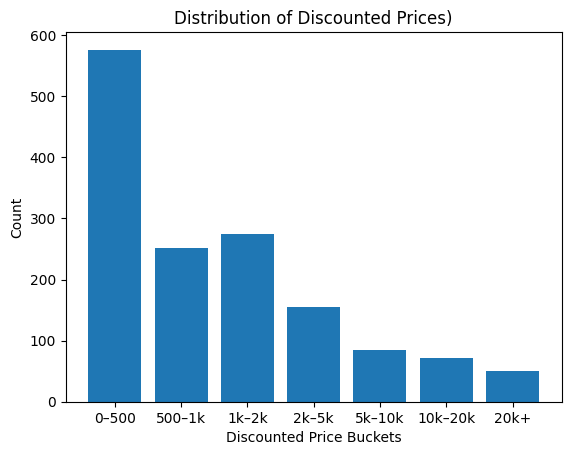

In [18]:
eda_df['discounted_price_bucket'] = pd.cut(
    eda_df['discounted_price'],
    bins=bins_price,
    labels=labels_price,
    include_lowest=True
)

discounted_price_dist = (eda_df['discounted_price_bucket'].value_counts().sort_index().reset_index())

discounted_price_dist.columns = ['discounted_price_bucket', 'count']

plt.figure()
plt.bar(discounted_price_dist['discounted_price_bucket'], discounted_price_dist['count'])
plt.xlabel('Discounted Price Buckets')
plt.ylabel('Count')
plt.title('Distribution of Discounted Prices)')
plt.show()

**Rating Counts**
*   Created 7 buckets to group rating counts
*   Highest distribution for the 1k-5k bucket
*   Buyers likely only want to buy products with at least 100 reviews
*   As expected, not many records have 100k+ ratings

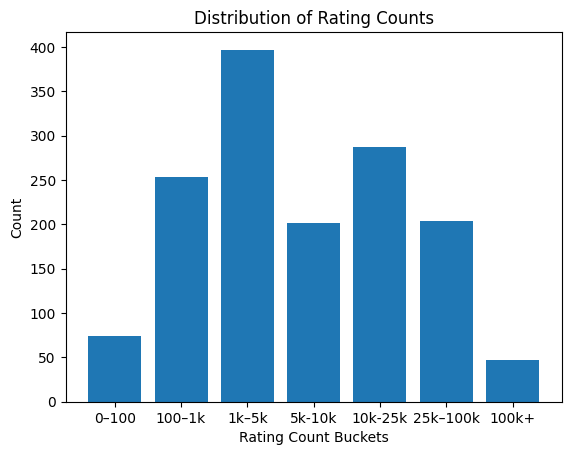

In [19]:
bins_rating_count = [0, 100, 1000, 5000, 10000, 25000, 100000, 500000]
labels_rating_count = ['0–100', '100–1k', '1k–5k', '5k-10k', '10k-25k', '25k–100k', '100k+']

eda_df['rating_count_bucket'] = pd.cut(
    eda_df['rating_count'],
    bins=bins_rating_count,
    labels=labels_rating_count,
    include_lowest=True
)

rating_count_dist = (eda_df['rating_count_bucket'].value_counts().sort_index().reset_index())

rating_count_dist.columns = ['rating_count_bucket', 'count']

plt.figure()
plt.bar(rating_count_dist['rating_count_bucket'], rating_count_dist['count'])
plt.xlabel('Rating Count Buckets')
plt.ylabel('Count')
plt.title('Distribution of Rating Counts')
plt.show()

### **1.5.2 Product Reviews**
*   Created a new dataframe that groups the dataset by product
*   Aggregated by pulling the highest 'rating_count' for each product, and calculated average rating of the records in this dataset
*   There are 1350 rows, which means there are 1350 unique products of the 1465 reviews

Displayed the top 20 products by total reviews
*   One thing I noticed is that the total reviews repeat because they are for different versions of the same product
*   All of the top 20 have at least 175k reviews
*   Only one product in the top 20 has below a 4.1 rating (3.8)
*   It will be important to treat this variable carefully during modeling because these extreme values may cause issues

Displayed the bottom 20 products by total reviews
*   13 product reviews were for products that had single digit ratings, with 2 reviews for products that have possibly never been reviewed before
*   Wide range of average ratings for the bottom 20 products, ranging between 2.0 and 5.0 ratings

In [20]:
product_reviews = (
    cleaned_df.groupby(['product_id', 'product_name'], as_index=False)
    .agg(
        total_reviews=('rating_count', 'max'),
        avg_rating=('rating', 'mean')))

product_reviews

,product_id,product_name,total_reviews,avg_rating
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,8131.0,4.1
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692.0,4.2
2,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,27201.0,4.3
3,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",31534.0,4.3
4,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",54405.0,4.5
...,...,...,...,...
1345,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,43.0,4.0
1346,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,2.0,2.0
1347,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",28.0,4.8
1348,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",0.0,5.0


In [21]:
most_reviewed = product_reviews.sort_values('total_reviews', ascending=False).head(20)

most_reviewed

,product_id,product_name,total_reviews,avg_rating
137,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0,4.4
356,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
138,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0,4.4
318,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0,4.1
317,B07GPXXNNG,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0,4.1
232,B071Z8M4KX,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0,4.1
906,B09GFLXVH9,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0,4.1
910,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0,4.1
909,B09GFPN6TP,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832.0,4.1
907,B09GFM8CGS,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0,4.1


In [22]:
least_reviewed = product_reviews.sort_values('total_reviews', ascending=True).head(20)

least_reviewed

,product_id,product_name,total_reviews,avg_rating
1348,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",0.0,5.0
1256,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,0.0,3.0
1170,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,2.0,3.1
1346,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,2.0,2.0
1304,B0BGPN4GGH,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,4.0,3.8
1316,B0BL3R4RGS,VAPJA® Portable Mini Juicer Cup Blender USB Re...,4.0,3.6
1335,B0BNLFQDG2,"Longway Blaze 2 Rod Quartz Room Heater (White,...",4.0,3.7
1341,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,5.0,5.0
1330,B0BN2576GQ,"C (DEVICE) Lint Remover for Woolen Clothes, El...",6.0,3.7
1201,B0B4SJKRDF,Kitchenwell Multipurpose Portable Electronic D...,7.0,4.3


### **1.5.3 Product Categories**
*   Used 'nunique' to see how many different categories there were, and displayed all the unique categories
*   The categories are split with '|', and breaking up the categories seemed into multiple levels is probably the best course of action
*   Split the category column into 4 levels to do analysis and views by different levels. Used 'head' function to make sure it was done correctly

In [23]:
print(cleaned_df['category'].nunique())
cleaned_df['category'].unique()

211


array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [24]:
category_levels = cleaned_df['category'].str.split('|', expand=True)

cleaned_df['category_1'] = category_levels[0]
cleaned_df['category_2'] = category_levels[1]
cleaned_df['category_3'] = category_levels[2]
cleaned_df['category_4'] = category_levels[3]

cleaned_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,clean_review_content,category_1,category_2,category_3,category_4
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,look durable charging fine toono complains cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,ordered cable connect phone android auto car c...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,quite durable sturdy good nice product working...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,good product long wire charge good nice bought...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,bought instead original apple work fast apple ...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


**Category 1st Level**
*   Grouped the dataset by the newly created 'category_1' and aggregated with average rating and review count
*   Nearly all reviews in the dataset are for the top 3 categories (Electronics, Computers & Accessories, and Home & Kitchen)
*   OfficeProducts has the highest average rating with 4.31
*   Of the main 3 categories, Computers & Accessories has the highest average rating with 4.15



In [25]:
category1_rating_summary = (
    cleaned_df.groupby('category_1')
    .agg(
        avg_rating=('rating', 'mean'),
        review_count=('review_id', 'count'))
    .sort_values('review_count', ascending=False))

category1_rating_summary

,avg_rating,review_count
category_1,,
Electronics,4.081749,526
Computers&Accessories,4.154967,453
Home&Kitchen,4.040716,447
OfficeProducts,4.309677,31
MusicalInstruments,3.900000,2
HomeImprovement,4.250000,2
Car&Motorbike,3.800000,1
Health&PersonalCare,4.000000,1
Toys&Games,4.300000,1


**Category 2nd Level**
*   Did the same grouping and aggregation with 'category_2'
*   The top 7 2nd level categories make up the vast majority of the dataset, with Accessories&Peripherals and Kitchen&HomeAppliances as the top 2
*   Of the top few 2nd level categories, Heating,Cooling&AirQuality and Headphones,Earbuds&Accessories have the lowest average ratings with 3.99 and 3.92
*   Of the top few 2nd level categories, Accessories&Peripherals and Mobiles&Accessories have the highest average ratings with 4.15 and 4.13
*   With the categories already getting pretty thin, analyzing category levels 3 and 4 is probably not that valuable



In [26]:
category2_rating_summary = (
    cleaned_df.groupby('category_2')
    .agg(
        avg_rating=('rating', 'mean'),
        review_count=('review_id', 'count'))
    .sort_values('review_count', ascending=False))

category2_rating_summary

,avg_rating,review_count
category_2,,
Accessories&Peripherals,4.148556,381
Kitchen&HomeAppliances,4.053420,307
"HomeTheater,TV&Video",4.075309,162
Mobiles&Accessories,4.127950,161
"Heating,Cooling&AirQuality",3.990517,116
WearableTechnology,4.025000,76
"Headphones,Earbuds&Accessories",3.925758,66
NetworkingDevices,4.155882,34
OfficePaperProducts,4.288889,27


**1st Level Category Distributions**
*   Sorted the 1st level category from most to least review counts
*   Plotted the distributions of ratings for the 9 1st level categories
*   The top 3 categories have similar distributions with heavy concentration between 3.8 and 4.2
*   OfficeProducts is entirely concentrated between 3.9 and 4.5
*   The rest of the categories have one review at various ratings


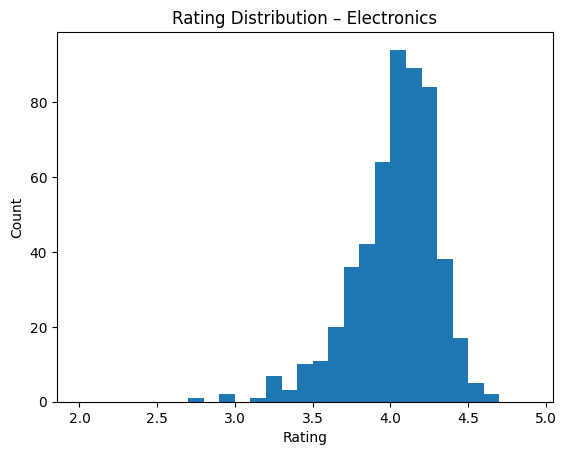

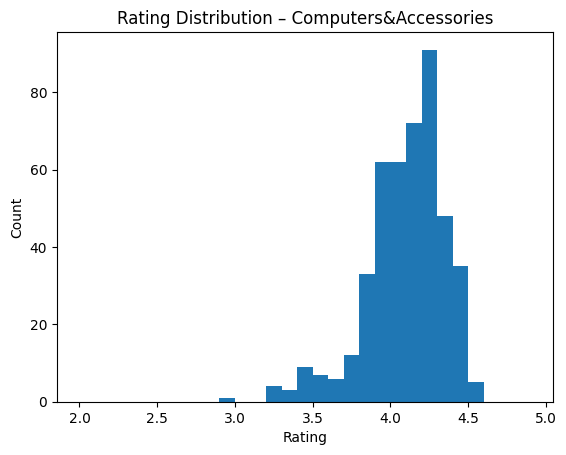

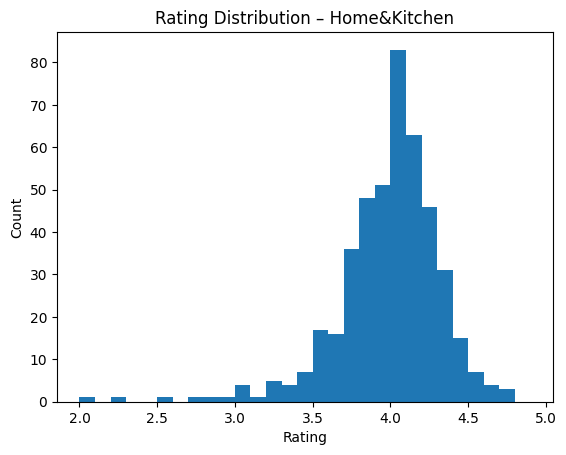

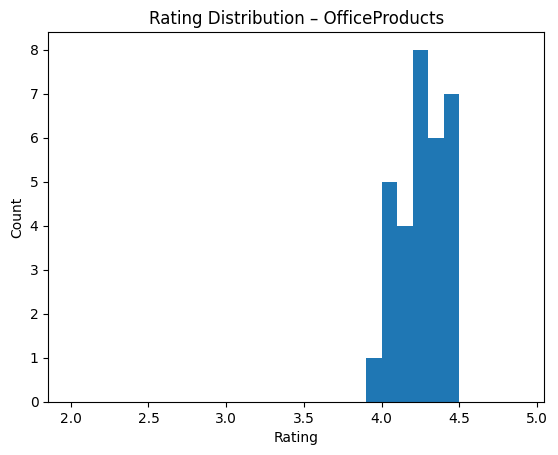

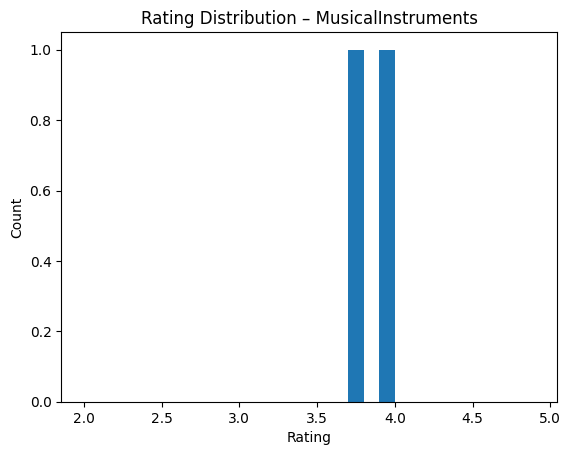

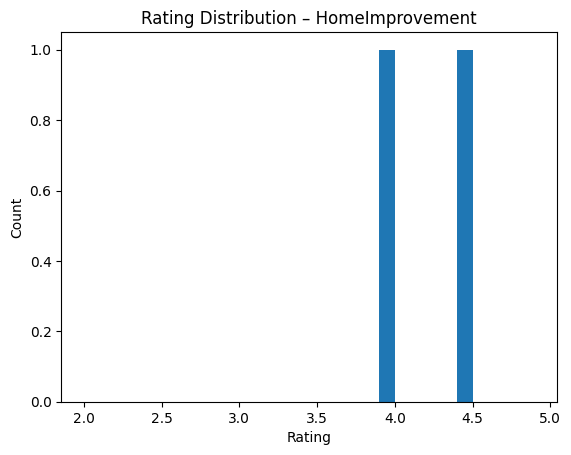

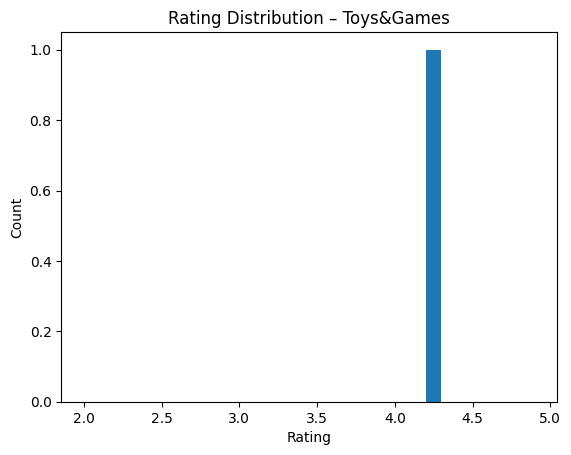

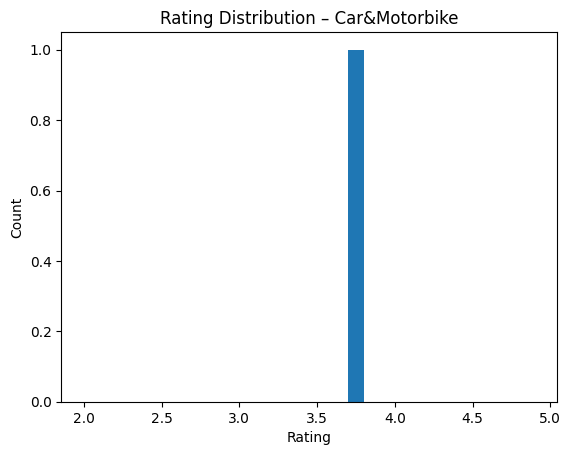

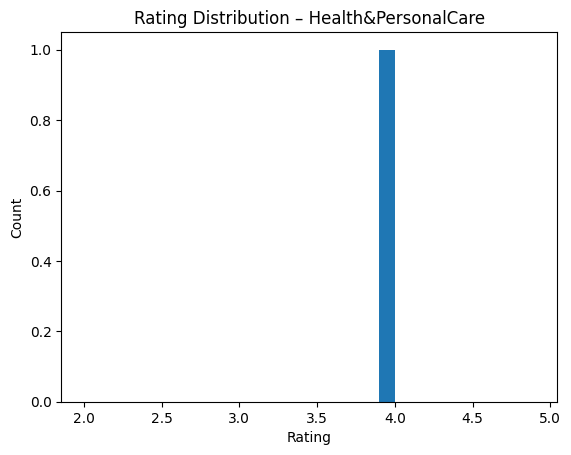

In [27]:
category_order = (cleaned_df['category_1'].value_counts().index)
categories = category_order[:9]

for cat in categories:
    subset = cleaned_df[cleaned_df['category_1'] == cat]

    plt.figure()
    plt.hist(subset['rating'], bins=np.arange(2, 5.0, 0.1))
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title(f'Rating Distribution – {cat}')
    plt.show()

# **2. Feature Engineering and Predictive Modeling**

## **2.1 Creating New Features**
*   Will create new columns for review length, sentiment polarity, and price drop percentage



### **2.1.1 Review Length**
*   Used the lambda, length, and split functions to find the number of words in the 'clean_review_content' column
*   The average review length is 131 words and the median is 78 words, which means that long reviews are bringing the average up
*   50% of reviews are between 48 and 131 words
*   Plotted the distribution, and we can see that the vast majority of reviews are on the shorter end




In [28]:
cleaned_df['review_length'] = cleaned_df['clean_review_content'].apply(lambda x: len(x.split()))
cleaned_df['review_length'].describe()

,review_length
count,1464.000000
mean,130.726093
std,166.816571
min,6.000000
25%,48.000000
50%,78.000000
75%,131.000000
max,1713.000000


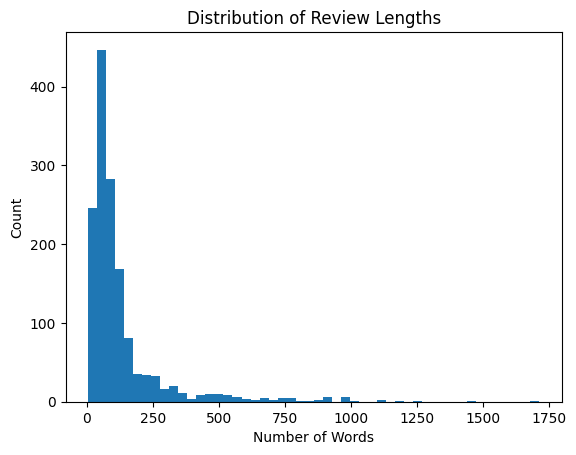

In [29]:
plt.figure()
plt.hist(cleaned_df['review_length'], bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.show()

### **2.1.2 Sentiment Polarity**
*   Installed vaderSentiment to calculate sentiment polarity
*   Initialized the sentiment analyzer and created a function that calculates the polarity scores if the text is not blank
*   Applied the function to the 'clean_review_content', and added the 'compound' score to the cleaned dataframe. Ran 'head' function to check if it joined on correctly.
*   Looked at sentiment by 1st level category, and it isn't that helpful because most of the reviews are very positive



In [30]:
!pip install vaderSentiment

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sent_analyzer = SentimentIntensityAnalyzer()
def vader_scores(text):
    if pd.isna(text):
        text = ''
    return sent_analyzer.polarity_scores(str(text))

vader_scores_df = cleaned_df['clean_review_content'].apply(vader_scores).apply(pd.Series)
vader_scores_df.head()

,neg,neu,pos,compound
0,0.047,0.541,0.412,0.9537
1,0.038,0.636,0.325,0.9907
2,0.000,0.386,0.614,0.8795
3,0.031,0.499,0.470,0.9758
4,0.089,0.609,0.302,0.9959


In [32]:
cleaned_df = pd.concat([cleaned_df, vader_scores_df['compound']], axis=1)

cleaned_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_content,img_link,product_link,clean_review_content,category_1,category_2,category_3,category_4,review_length,compound
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,look durable charging fine toono complains cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,40,0.9537
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,ordered cable connect phone android auto car c...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,118,0.9907
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,quite durable sturdy good nice product working...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,11,0.8795
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,good product long wire charge good nice bought...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,43,0.9758
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,bought instead original apple work fast apple ...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,239,0.9959


In [33]:
category_sentiment = (
    cleaned_df.groupby('category_1')
    .agg(
        avg_sentiment=('compound', 'mean'),
        review_count=('review_id', 'count'))
    .sort_values('review_count', ascending=False))

category_sentiment

,avg_sentiment,review_count
category_1,,
Electronics,0.941793,526
Computers&Accessories,0.962747,453
Home&Kitchen,0.932533,447
OfficeProducts,0.965926,31
MusicalInstruments,0.998500,2
HomeImprovement,0.941800,2
Car&Motorbike,0.986500,1
Health&PersonalCare,0.977400,1
Toys&Games,0.991300,1


**Sentiment Polarity Correlations**
*   Looked at the correlation between compound and rating/review_length
*   Used spearman method because it is more robust to outliers and skewed data
*   0.257 correlation for compound vs. rating is a slightly positive correlation
*   0.701 correlation for compound vs. review_length is a strong positive correlation which means that longer reviews have stronger positive emotions


In [34]:
cleaned_df[['compound', 'rating']].corr(method='spearman')

,compound,rating
compound,1.000000,0.256864
rating,0.256864,1.000000


In [35]:
cleaned_df[['compound', 'review_length']].corr(method='spearman')

,compound,review_length
compound,1.000000,0.701278
review_length,0.701278,1.000000


**Sentiment Polarity Bar Graphs**
*   Split review_length into 5 buckets and grouped by them to plot on a bar graph
*   We can see that sentiment increases as it moves to the right towards the longer review_length buckets
*   When looking at the same discount buckets as before, we don't see any strong distinction between the average compound scores, which means that discounts don't necessarily mean a more positive sentiment from customers

/tmp/ipython-input-3827446031.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_sentiment = (cleaned_df.groupby('length_bucket')['compound'].mean())


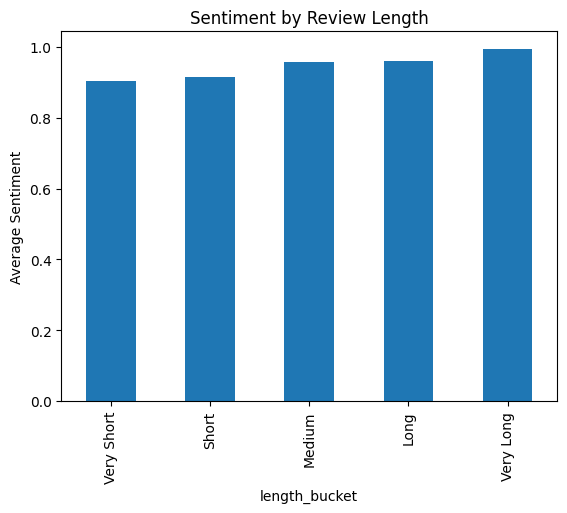

In [36]:
cleaned_df['length_bucket'] = pd.qcut(
    cleaned_df['review_length'],
    q=5,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

length_sentiment = (cleaned_df.groupby('length_bucket')['compound'].mean())

length_sentiment.plot(kind='bar')
plt.ylabel('Average Sentiment')
plt.title('Sentiment by Review Length')
plt.show()

/tmp/ipython-input-3775692186.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_sentiment = (cleaned_df.groupby('discount_bucket')['compound'].mean())


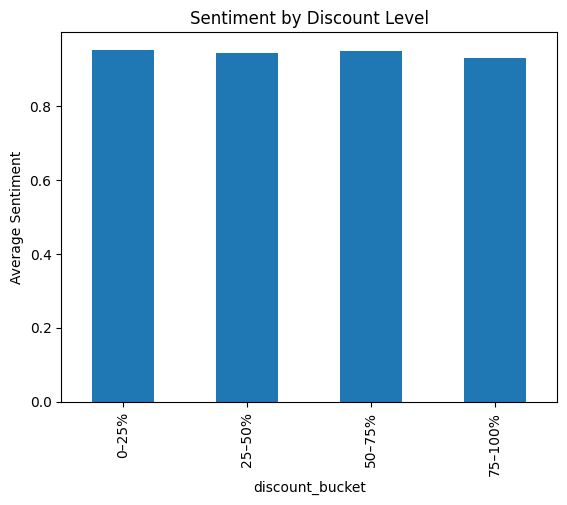

In [37]:
cleaned_df['discount_bucket'] = pd.cut(
    cleaned_df['discount_percentage'],
    bins=[0, 25, 50, 75, 100],
    labels=['0–25%', '25–50%', '50–75%', '75–100%'],
    include_lowest=True)

discount_sentiment = (cleaned_df.groupby('discount_bucket')['compound'].mean())

discount_sentiment.plot(kind='bar')
plt.ylabel('Average Sentiment')
plt.title('Sentiment by Discount Level')
plt.show()

### **2.1.3 Price Drop Percentage**
*   Calculated the actual price drop % with the actual_price and discounted_price
*   Used the 'describe' function to look some summary statistics
*   I wanted to check how close our calculated price drop % was with the dataset's discount_percentage. The 'match_rate' calculations show that 51.8% of records are within 0.2%, and all records are within 0.5% from the dataset's column.
*   We should use our calculated 'price_drop_pct' for modeling due to being slightly more accurate

In [38]:
cleaned_df['price_drop_pct'] = ((cleaned_df['actual_price'] - cleaned_df['discounted_price']) / cleaned_df['actual_price']) * 100

cleaned_df['price_drop_pct'].describe()

,price_drop_pct
count,1464.000000
mean,47.706563
std,21.627797
min,0.000000
25%,32.001280
50%,50.016672
75%,62.895749
max,94.118824


In [39]:
cleaned_df['discount_diff'] = (cleaned_df['price_drop_pct'] - cleaned_df['discount_percentage']).abs()

match_rate = (cleaned_df['discount_diff'] <= 0.2).mean() * 100
print(match_rate)

match_rate_2 = (cleaned_df['discount_diff'] <= 0.5).mean() * 100
print(match_rate_2)

51.84426229508197
100.0


## **2.2 Encoding Categorical Variables**
*   Looking at the categorical columns, the only logical column to encode is 'category_1' because the other columns have too many unique values and also do not add much value. 'User_name' would create way too much additional columns, and also likely lead to overfitting.
*   When looking at the counts of 1st level category, we see the 5 smallest categories have 2 or less reviews, so I grouped all of these into an 'Other' category to make modeling easier
*   Used 'get_dummies' function to encode the 'category_1_clean' column, used 'head' function to check if it was done correctly



In [40]:
category_counts = cleaned_df['category_1'].value_counts()
category_counts

,count
category_1,
Electronics,526
Computers&Accessories,453
Home&Kitchen,447
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [41]:
cleaned_df['category_1_clean'] = cleaned_df['category_1'].where(cleaned_df['category_1'].map(category_counts) >= 5, 'Other')
cleaned_df['category_1_clean'].value_counts()

,count
category_1_clean,
Electronics,526
Computers&Accessories,453
Home&Kitchen,447
OfficeProducts,31
Other,7


In [42]:
encoded_cat = pd.get_dummies(cleaned_df['category_1_clean'], prefix='cat')

encoded_cat.head()

,cat_Computers&Accessories,cat_Electronics,cat_Home&Kitchen,cat_OfficeProducts,cat_Other
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


## **2.3 TF-IDF Vectorization**
*   Imported the TF-IDF Vectorizer
*   Initialized a vectorizer with 15k features, unigams/bigrams, while ignoring words/phrases that show up less than 2 times

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),
    min_df=2)

X_vector = vector.fit_transform(cleaned_df['clean_review_content'])
X_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 190223 stored elements and shape (1464, 15000)>

## **2.4 Pre-Modeling**
*   Created a copy of the cleaned_df as the model_df
*   Created the 'sentiment_label' column that is only set to 1 when the rating is more than 3.5. The instructions say to use >= 3 rating as positive, but that left only 6 negative reviews in the whole dataset, which would make it impossible to model effectively.
*   Selected the 7 columns that we will actually use for modeling. The other columns like 'product_id', 'used_id', etc. would either not be useful for modeling, or gives too much information to the model
*   Used 'head' function to show the first 5 records to make sure the dataframe was created correctly

There are 3 components to the features for X:
*   X_test: used the TF-IDF vector
*   X_cat: used the encoded 1st level categories
*   X_num: the numeric values in the modelling dataframe

Model Components:
*   Imported and used hstack to combine the 3 components for X
*   Set the target variable 'y' to the 'sentiment_label'
*   Printed the shape of X and y to make sure everything worked correctly. 15,009 columns is correct because there are 15,000 TF-IDF features, 4 numeric, and 5 category dummy columns
*   Using my updated threshold of >3.5 rating left 68 negative reviews, which will likely be easier to evaluate models

In [44]:
model_df = cleaned_df.copy()
model_df['sentiment_label'] = (model_df['rating'] > 3.5).astype(int)

model_df = model_df[
    [
        'clean_review_content',
        'review_length',
        'compound',
        'price_drop_pct',
        'rating_count',
        'category_1_clean',
        'sentiment_label']]
model_df.head()

,clean_review_content,review_length,compound,price_drop_pct,rating_count,category_1_clean,sentiment_label
0,look durable charging fine toono complains cha...,40,0.9537,63.694268,24269.0,Computers&Accessories,1
1,ordered cable connect phone android auto car c...,118,0.9907,42.979943,43994.0,Computers&Accessories,1
2,quite durable sturdy good nice product working...,11,0.8795,89.520800,7928.0,Computers&Accessories,1
3,good product long wire charge good nice bought...,43,0.9758,52.932761,94363.0,Computers&Accessories,1
4,bought instead original apple work fast apple ...,239,0.9959,61.403509,16905.0,Computers&Accessories,1


In [45]:
from scipy.sparse import hstack

X_text = X_vector
X_cat = encoded_cat.values
X_num = model_df[['review_length', 'compound', 'price_drop_pct', 'rating_count']].fillna(0).values

X = hstack([X_text, X_cat, X_num])
y = model_df['sentiment_label']

print('X shape:', X.shape)
print('y shape:', y.shape)
y.value_counts()

X shape: (1464, 15009)
y shape: (1464,)


,count
sentiment_label,
1,1396
0,68


## **2.5 Logistic Regression Model**
*   Imported train_test_split and StandardScaler
*   Split the training dataset with 80/20 splits with random state 42 and stratified target
*   Logistic Regression Models perform best with scaled numeric features, and since the hstack function in the previous step put 'X_num' last, the 4 last columns will be the numeric columns that should be scaled
*   Used the scaler to fit to the numeric values that should be scaled, and then combined them back together
*   Printed the counts in the training set's target variable, and we see a large imbalance
*   Due to this imbalance, I applied SMOTE to resample to be more evenly distributed

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_num = X_train[:, -4:]
X_test_num  = X_test[:, -4:]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num.toarray())
X_test_num_scaled  = scaler.transform(X_test_num.toarray())

X_train_scaled = hstack([X_train[:, :-4], X_train_num_scaled])
X_test_scaled = hstack([X_test[:, :-4], X_test_num_scaled])

y_train.value_counts()

,count
sentiment_label,
1,1117
0,54


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print(y_train_res.value_counts())

sentiment_label
1    1117
0    1117
Name: count, dtype: int64


**Logistic Model Evaluation**
*   Imported the LogisticRegression package along with all the metrics to evaluate the models
*   Ran the model with and without SMOTE to evaluate the performance for both
*   Overall f1-score accuracy decreased minimally from 95% to 94%, but for the negative reviews, it improve drastically from 12% to 31%
*   The recall also increased from 7% to 29%, which shows a significant improvement in the model's ability to find the negative reviews
*   The low recall and f1-scores is not too concerning or surprising because the dataset contains very few negative reviews
*   The ROC-AUCs are very close at 0.829 and 0.837 respectively

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\n Logistic Regression Classification Report:\n', classification_report(y_test, y_pred))
print('\nROC AUC:', roc_auc_score(y_test, y_prob))

Logistic Regression Confusion Matrix:
 [[  1  13]
 [  2 277]]

 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.07      0.12        14
           1       0.96      0.99      0.97       279

    accuracy                           0.95       293
   macro avg       0.64      0.53      0.55       293
weighted avg       0.93      0.95      0.93       293


ROC AUC: 0.829237071172555


In [49]:
log_reg_smote = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg_smote.fit(X_train_res, y_train_res)

y_pred = log_reg_smote.predict(X_test_scaled)
y_prob = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

print('Logistic Regression (SMOTE) Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nLogistic Regression (SMOTE) Classification Report:\n', classification_report(y_test, y_pred))
print('\nROC AUC:', roc_auc_score(y_test, y_prob))

Logistic Regression (SMOTE) Confusion Matrix:
 [[  4  10]
 [  8 271]]

Logistic Regression (SMOTE) Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.29      0.31        14
           1       0.96      0.97      0.97       279

    accuracy                           0.94       293
   macro avg       0.65      0.63      0.64       293
weighted avg       0.93      0.94      0.94       293


ROC AUC: 0.8366615463389656


## **2.6 Decision Tree Model**
*   Imported the DecisionTreeClassifier model
*   Used 'max_depth' 20 to limit the maximum depth of the tree to 20 levels
*   Used 'min_samples_leaf' 50 to require at least 50 samples in each leaf node
*   Use the 'class_weight' balanced to adjust the importance of each class. I used this instead of SMOTE because training a Decision Tree with synthetic data could cause some issues
*   Fit the model and evaluated it. It had an overall f1-score of 66%, and f1-score on negative reviews of 14%. However, it had a recall on negative reviews of 57%. The Decision Tree model sacrifices accuracy overall for capturing more than half of the negative reviews.
*   To try to optimize the Decision Tree model, I imported and used GridSearch to find the optimal values for the 'max_depth' and 'min_samples_leaf' parameters
*   The optimal parameters of the 3 options I listed for each were: 10 and 20 respectively
*   The tuned hyperparameters improved overall f1-score from 66% to 71%, but recall for negative reviews decreased from 57% to 36%. The ROC-AUC also decreased fomr 0.642 to 0.551
*   If the goal is overall accuracy, the tuned model is the better option, but if the business need is finding negative reviews, then maybe the original model is better


In [50]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(
    max_depth=20,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)

dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
y_prob = dec_tree.predict_proba(X_test)[:, 1]

print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nDecision Tree Classification Report:\n', classification_report(y_test, y_pred))
print('\nROC AUC:', roc_auc_score(y_test, y_prob))

Decision Tree Confusion Matrix:
 [[  8   6]
 [ 93 186]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.57      0.14        14
           1       0.97      0.67      0.79       279

    accuracy                           0.66       293
   macro avg       0.52      0.62      0.46       293
weighted avg       0.93      0.66      0.76       293


ROC AUC: 0.642089093701997


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [20, 50, 100]}

dec_tree_base = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)
grid = GridSearchCV(
    dec_tree_base,
    param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 20}


In [52]:
best_dec_tree = grid.best_estimator_

y_pred = best_dec_tree.predict(X_test)
y_prob = best_dec_tree.predict_proba(X_test)[:, 1]

print('Best Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nBest Decision Tree Classification Report:\n', classification_report(y_test, y_pred))
print('\nROC AUC:', roc_auc_score(y_test, y_prob))

Best Decision Tree Confusion Matrix:
 [[  5   9]
 [ 77 202]]

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.36      0.10        14
           1       0.96      0.72      0.82       279

    accuracy                           0.71       293
   macro avg       0.51      0.54      0.46       293
weighted avg       0.91      0.71      0.79       293


ROC AUC: 0.550563236047107


## **2.7 Random Forests Model**
*   Imported the RandomForestClassifier model
*   Initialized the model with 300 n_estimators which is the number of trees in the forest, no max depth, and 'min_samples_leaf' 10 to require each sample to have 10 records
*   Use the 'class_weight' balanced to adjust the importance of each class. I used this instead of SMOTE because training a Random Forest with synthetic data could cause some issues
*   Fit the model and evaluated it. It had an overall f1-score of 94%, and f1-score on negative reviews of 18%. It had a recall on negative reviews of 14%. The Random Forest model has good overall accuracy, but doesn't perform that well with negative reviews.
*   To try to optimize the Random Forest model, I imported and used GridSearch to find the optimal values for the 'n_estimators', 'max_depth' and 'min_samples_leaf' parameters
*   The optimal parameters of the 2 options I listed for each were: 200, None, and 25 respectively
*   The tuned parameters actually made the model slightly worse, as it decreased overall f1-score from 94% to 92%, not improving negative review recall from 14% , and ROC-AUC from 0.822 to 0.761.

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nRandom Forest Classification Report:\n', classification_report(y_test, y_pred))
print('\nROC AUC:', roc_auc_score(y_test, y_prob))

Random Forest Confusion Matrix:
 [[  2  12]
 [  6 273]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.96      0.98      0.97       279

    accuracy                           0.94       293
   macro avg       0.60      0.56      0.57       293
weighted avg       0.92      0.94      0.93       293


ROC AUC: 0.8218125960061444


In [54]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 20],
    'min_samples_leaf': [10, 25]}

rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

grid_rf = GridSearchCV(
    rf_base,
    param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)

{'max_depth': None, 'min_samples_leaf': 25, 'n_estimators': 200}


In [55]:
best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print('Best Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nBest Random Forest Classification Report:\n', classification_report(y_test, y_pred))
print('\nROC AUC:', roc_auc_score(y_test, y_prob))

Best Random Forest Confusion Matrix:
 [[  2  12]
 [ 12 267]]

Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.14      0.14        14
           1       0.96      0.96      0.96       279

    accuracy                           0.92       293
   macro avg       0.55      0.55      0.55       293
weighted avg       0.92      0.92      0.92       293


ROC AUC: 0.7611367127496159


## **2.8 Sentiment Classification Model Evaluation**
*   The best versions of each model were Logistic Regression (with SMOTE), tuned Decision Tree, and not tuned Random Forest
| Model | Negative Recall | Negative F1 | Macro F1 | ROC AUC | Accuracy |
|---|---|---|---|---|---|
| Logistic Regression (SMOTE) | 0.29 | 0.31 | 0.64 | 0.84 | 0.94 |
| Decision Tree (Tuned) | 0.36 | 0.10 | 0.46 | 0.55 | 0.71 |
| Random Forest | 0.14 | 0.18 | 0.57 | 0.82 | 0.94 |

*   The Logistic Regression model is the best overall model for sentiment classification because it has the best performance on overall accuracy 94% and ROC-AUC 0.84, while still being able to idenity negative reviews. It has the 2nd best negative recall, but performs much better than the Decision Tree model for negative f1-score.


## **2.9 Rating Prediction Models**
*   Since the target variable has changed from 'sentiment_label' to 'rating', we need to change the dataset a bit
*   Created a copy of the 'model_df' as 'rating_model_df' for these models
*   Brought back in the 'rating' column, and dropped the 'sentiment_label' to avoid leakage
*   Used the 'head' function to make sure the new dataframe looks correct
*   Set the target variable 'y_reg' to rating, and resplit the dataset into train/test
*   Applied the exact same scaling logic as the sentiment classification models

In [56]:
rating_model_df = model_df.copy()
rating_model_df['rating'] = cleaned_df['rating']
rating_model_df = rating_model_df.drop(columns=['sentiment_label'])
rating_model_df.head()

,clean_review_content,review_length,compound,price_drop_pct,rating_count,category_1_clean,rating
0,look durable charging fine toono complains cha...,40,0.9537,63.694268,24269.0,Computers&Accessories,4.2
1,ordered cable connect phone android auto car c...,118,0.9907,42.979943,43994.0,Computers&Accessories,4.0
2,quite durable sturdy good nice product working...,11,0.8795,89.520800,7928.0,Computers&Accessories,3.9
3,good product long wire charge good nice bought...,43,0.9758,52.932761,94363.0,Computers&Accessories,4.2
4,bought instead original apple work fast apple ...,239,0.9959,61.403509,16905.0,Computers&Accessories,4.2


In [57]:
y_reg = rating_model_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

X_train_num = X_train[:, -4:]
X_test_num  = X_test[:, -4:]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num.toarray())
X_test_num_scaled  = scaler.transform(X_test_num.toarray())

X_train_scaled = hstack([X_train[:, :-4], X_train_num_scaled])
X_test_scaled = hstack([X_test[:, :-4], X_test_num_scaled])

**Linear Regression Model**
*   Imported the LinearRegression package and initialized the model
*   Fit the model to 'X_train_scaled' and 'y_train'


In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

**Ridge Model**
*   Imported the Ridge package and initialized the model
*   Since there is only one parameter 'alpha', I decided to only do the tuned version of the model. Alpha is a hyperparameter that controls the strength of the L2 regularization penalty.
*   Gave GridSearch 5 options for alpha to pick the optimal value based on RMSE
*   Fit the model to 'X_train_scaled' and 'y_train', and found the best alpha to be 1

In [59]:
from sklearn.linear_model import Ridge

ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(
    ridge,
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1)

grid_ridge.fit(X_train_scaled, y_train)

best_ridge = grid_ridge.best_estimator_
print('Best alpha (Ridge):', grid_ridge.best_params_)

Best alpha (Ridge): {'alpha': 1}


**Lasso Model**
*   Imported the Lasso package and initialized the model
*   For the same reason as Ridge, I decided to only do the tuned version of the model.
*   Gave GridSearch 5 options for alpha to pick the optimal value based on RMSE
*   Fit the model to 'X_train_scaled' and 'y_train', and found the best alpha to be 0.0001

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_lasso = GridSearchCV(
    lasso,
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1)

grid_lasso.fit(X_train_scaled, y_train)

grid_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
print('Best alpha (Lasso):', grid_lasso.best_params_)

Best alpha (Lasso): {'alpha': 0.0001}


**Rating Prediction Model Evaluation**
*   Imported mean_squared_error and r2_score for evaluation
*   RMSE is the average prediction error of the model, which in this case is how far the rating is off (lowest is better). It is important to note that the max rating is 5.
*   R squared measures the proportion of variance that is explained by each model (higher is better)
*   The best model for predicting ratings is the tuned Ridge Model, then tuned Lasso Model, and the Linear Regression Model was the worst of the 3
*   The tuned Ridge Model had the lowest RMSE of 0.23, which means on average, the model's predicted rating is 0.23 "stars" off the actual rating
*   The Ridge Model also had the highest R squared which means it had the highest explained variance, with double that of the Linear Regression Model
*   This demonstrated that the L2 regularization (alpha) in the Ridge Model was pretty effective when using the text vectors. Also, it is likely that the Linear Regression Model underfit the data.

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

def eval_reg(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

results = {
    'Linear': eval_reg(lin_reg, X_test_scaled, y_test),
    'Best Ridge': eval_reg(best_ridge, X_test_scaled, y_test),
    'Best Lasso': eval_reg(best_lasso, X_test_scaled, y_test)
}

results_df = pd.DataFrame(results).T
results_df


,MSE,RMSE,R2
Linear,0.066094,0.257088,0.148233
Best Ridge,0.054375,0.233185,0.299256
Best Lasso,0.060964,0.246909,0.214342


# **3. Deep Learning & NLP for Review Analysis**

## **3.1 Deep Learning Model Preparation**
*   Created a copy of 'rating_model_df' as 'dl_model_df', and used 'head' function to double check which columns it had
*   Set 'X_text' to the cleaned review text, and target variable to 'rating'
*   Split the dataset into train/test with the same 80/20 split, random state, and with stratification due to class imbalance
*   Displayed the shape of training and testing sets to check if everything was done correctly

In [62]:
dl_model_df = rating_model_df.copy()
dl_model_df.head()

,clean_review_content,review_length,compound,price_drop_pct,rating_count,category_1_clean,rating
0,look durable charging fine toono complains cha...,40,0.9537,63.694268,24269.0,Computers&Accessories,4.2
1,ordered cable connect phone android auto car c...,118,0.9907,42.979943,43994.0,Computers&Accessories,4.0
2,quite durable sturdy good nice product working...,11,0.8795,89.520800,7928.0,Computers&Accessories,3.9
3,good product long wire charge good nice bought...,43,0.9758,52.932761,94363.0,Computers&Accessories,4.2
4,bought instead original apple work fast apple ...,239,0.9959,61.403509,16905.0,Computers&Accessories,4.2


In [63]:
X_text = dl_model_df['clean_review_content'].fillna('').astype(str)
y = dl_model_df['rating'].astype(float).values

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

X_train_text.shape, X_test_text.shape, y_train.shape, y_test.shape

((1171,), (293,), (1171,), (293,))

## **3.2 Creating the Vector**
*   Imported tensforflow and TextVectorization to build the Deep Learning Models
*   Used 'max_tokens' of 20,000 which is the maximum number of unique words that the vectorizer will index
*   Used 'sequence_length' of 200 which is the number of tokens that each processed text sample will have
*   Initialized the vector with max_tokens, 'output_mode' as 'int' to convert each review into sequence of integers, and creates a vocabulary of the most frequent tokens
*   Apply the vectorizer function to the training data, and pads the sequence to make sure they are always the same size
*   Used 'len' function to find the size of the vocabulary from the vector
*   Displayed the vocabulary size to see how many words there are
*   Displayed the shapes to make sure everything was done correctly

In [64]:
import tensorflow as tf
from keras.layers import TextVectorization

max_tokens = 20000
sequence_length = 200

vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=sequence_length,
    standardize='lower_and_strip_punctuation'
)

vectorizer.adapt(X_train_text)

X_train_pad = vectorizer(X_train_text)
X_test_pad = vectorizer(X_test_text)

vocab_size = len(vectorizer.get_vocabulary())
print(vocab_size)
X_train_pad.shape, X_test_pad.shape

9648


(TensorShape([1171, 200]), TensorShape([293, 200]))

## **3.3 Building the LSTM Model**
*   Imported Sequential, Embedding, LSTM, Dense, and Dropout libraries to use as functions in the model

Created the LSTM Model with the Sequential Model with the following layers:
*   Embedding Layer: Input dimensions of the vocab size, and converted into 256 dimension vectors
*   Bidirectional LSTM Layer: 128 units that processes each review sequence forward and backwards
*   Dropout Layers x2: Randomly drops 10% of neurons
*   Dense Layer (relu): 128 units that learns some higher-level interactions between features, and uses relu activation
*   Output Layer: outputs a prediction of the product rating

Compiling the Model:
*   Initialized an adam optimizer
*   Used MSE as loss, and measured RMSE and MAE as common metrics for regressions

In [77]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout


LSTM_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256),
    Bidirectional(LSTM(128)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

LSTM_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
             tf.keras.metrics.MeanAbsoluteError(name='mae')])

## **3.4 Training and Evaluating the LSTM Model**
*   Created an early stop to monitor RMSE during training (used 'min' because we want it to be lower, and a patience of 5 means it will stop training if it doesn't improve for 5 epochs)
*   For training the model, we fit it with 'X_train_pad' and 'y_train', used validation split of 20%, 50 epochs, batch size of 32, and applied the early stop function we just created

LSTM Model Valuation
*   The training stopped after 10 epochs
*   With a RMSE of 0.29, the predictions are off by about 0.3 "stars"
*   This is slightly worse than the Ridge Model that had 0.23
*   The R squared of -0.08 The model is performing worse than simply predicting the mean.

In [78]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_rmse', mode='min', patience=5, restore_best_weights=True)

history_LSTM = LSTM_model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 889ms/step - loss: 7.1618 - mae: 2.1910 - rmse: 2.5743 - val_loss: 0.0891 - val_mae: 0.2313 - val_rmse: 0.2986
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 827ms/step - loss: 0.1867 - mae: 0.3484 - rmse: 0.4318 - val_loss: 0.0811 - val_mae: 0.2217 - val_rmse: 0.2847
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 810ms/step - loss: 0.1767 - mae: 0.3244 - rmse: 0.4201 - val_loss: 0.0758 - val_mae: 0.2070 - val_rmse: 0.2754
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 967ms/step - loss: 0.1515 - mae: 0.3011 - rmse: 0.3890 - val_loss: 0.0790 - val_mae: 0.2078 - val_rmse: 0.2811
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 829ms/step - loss: 0.1427 - mae: 0.3009 - rmse: 0.3772 - val_loss: 0.0748 - val_mae: 0.2057 - val_rmse: 0.2735
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 839ms/step - loss: 0.1159 - mae: 0.2734 - rmse: 0.3403 - val_loss: 0.0832 - val_mae: 0.2283 - val_rmse: 0.2885
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 854ms/step - loss: 0.1121 - mae: 0.2623 

In [79]:
y_pred = LSTM_model.predict(X_test_pad).ravel()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('LSTM Regression MSE:', mse)
print('LSTM Regression RMSE:', rmse)
print('LSTM Regression R²:', r2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step
LSTM Regression MSE: 0.08419059033766968
LSTM Regression RMSE: 0.2901561481989821
LSTM Regression R²: -0.08497953787218693


## **3.5 Building the GRU Model**
*   Imported the GRU layer to build this model

Created the GRU Model with the Sequential Model with the following layers:
*   Embedding Layer: Input dimensions of the vocab size, and converted into 256 dimension vectors
*   Bidirection GRU Layers: 128 and 64 units that processes each review sequence forward and backwards
*   Dropout Layers: 1 20% and 2 10% layers that randomly drops 10 or 20% of neurons
*   Dense Layer (relu): 128 units that learns some higher-level interactions between features, and uses relu activation
*   Output Layer: outputs a prediction of the product rating

Compiling the Model:
*   Initialized an adam optimizer
*   Used MSE as loss, and measured RMSE and MAE as common metrics for regressions

In [85]:
from keras.layers import GRU, Bidirectional

GRU_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256),
    Bidirectional(GRU(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(64)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

GRU_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
             tf.keras.metrics.MeanAbsoluteError(name='mae')])

## **3.6 Training and Evaluating the GRU Model**
*   Created the same early stop function
*   For training the model, we used the same parameters as the LSTM model

GRU Model Valuation
*   The training stopped after 8 epochs
*   With a RMSE of 0.30, which was worse than the LSTM model
*   Also worse than the Ridge Model that had 0.23
*   The R squared of -0.17 The model is performing worse than simply predicting the mean
*   I tried countless combinations of layers, optimizers, and other parameters. I was unable to get the GRU model to imporve performance.

In [86]:
early_stop_gru = EarlyStopping(monitor='val_rmse', mode='min', patience=5, restore_best_weights=True)

history_GRU = GRU_model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop_gru],
    verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 7.6269 - mae: 2.3518 - rmse: 2.6824 - val_loss: 0.2168 - val_mae: 0.3218 - val_rmse: 0.4656
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 0.3145 - mae: 0.4435 - rmse: 0.5602 - val_loss: 0.1323 - val_mae: 0.3037 - val_rmse: 0.3637
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - loss: 0.1751 - mae: 0.3253 - rmse: 0.4183 - val_loss: 0.0870 - val_mae: 0.2221 - val_rmse: 0.2950
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.1525 - mae: 0.3003 - rmse: 0.3904 - val_loss: 0.0901 - val_mae: 0.2270 - val_rmse: 0.3002
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 0.1246 - mae: 0.2842 - rmse: 0.3527 - val_loss: 0.1001 - val_mae: 0.2493 - val_rmse: 0.3164
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.1170 - mae: 0.2645 - rmse: 0.3420 - val_loss: 0.1069 - val_mae: 0.2435 - val_rmse: 0.3270
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 0.1217 - mae: 0.2792 - rmse: 0.3485 - val_

In [87]:
y_pred = GRU_model.predict(X_test_pad).ravel()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('GRU Regression MSE:', mse)
print('GRU Regression RMSE:', rmse)
print('GRU Regression R²:', r2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step
GRU Regression MSE: 0.09060854792723047
GRU Regression RMSE: 0.3010125378239758
GRU Regression R²: -0.16768893130530715


## **3.7 Preparing Data for Summarization**
*   Used 'head' function on the cleaned_df to see which columns we should use
*   The 3 columns we care about for text summarization are 'product_id', 'product_name', and 'review_content'
*   Created a copy of those 3 columns as 'summary_df' that I will use for all text summarization analysis
*   There are 1,464 records, with 95 duplicates between all 3 columns pulled in. However there are 114 columns that are duplicates for 'product_id'
*   For the duplicates only on 'product_id', I decided to only pull the review that was the longest because it has more characters to summarize
*   Dropped the rest of the duplicates, and then double checked that there were no more duplicates

In [105]:
cleaned_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,category_2,category_3,category_4,review_length,compound,length_bucket,discount_bucket,price_drop_pct,discount_diff,category_1_clean
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,Accessories&Peripherals,Cables&Accessories,Cables,40,0.9537,Very Short,50–75%,63.694268,0.305732,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,Accessories&Peripherals,Cables&Accessories,Cables,118,0.9907,Long,25–50%,42.979943,0.020057,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,Accessories&Peripherals,Cables&Accessories,Cables,11,0.8795,Very Short,75–100%,89.520800,0.479200,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,Accessories&Peripherals,Cables&Accessories,Cables,43,0.9758,Very Short,50–75%,52.932761,0.067239,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,Accessories&Peripherals,Cables&Accessories,Cables,239,0.9959,Very Long,50–75%,61.403509,0.403509,Computers&Accessories


In [135]:
summary_df = cleaned_df[['product_id', 'product_name', 'review_content']].copy()

print(f'Total rows: {len(summary_df)}')
print(f'Duplicates (all 3 columns): {summary_df.duplicated().sum()}')
print(f'Duplicates (product_id only): {summary_df.duplicated(subset=['product_id']).sum()}')

Total rows: 1464
Duplicates (all 3 columns): 95
Duplicates (product_id only): 114


In [139]:
summary_df.loc[summary_df.groupby('product_id')['review_content'].apply(lambda x: x.str.len().idxmax())]
summary_df = summary_df.drop_duplicates(subset=['product_id'])
print(f'Duplicates (all 3 columns): {summary_df.duplicated().sum()}')

Duplicates (all 3 columns): 0


## **3.8 Extractive Text Summarization**
*   Installed 'sumy' package and imported PLaintextParser, Tokenizer, and TextRankSummarizer to conduct the text summarization

Created 'clean_review_text' function:
*   Ensures the text is a string and removes all leading and trailing whitespace
*   Makes sure there are no nulls or NaNs
*   Removes URLs
*   Commas before capital letters become pertiods
*   Multiple periods become single periods
*   Multiple spaces become single spaces
*   Removes emojis and other non-ASCII characters
*   Make sure each block of text ends with a period
*   Returns the text

Created 'textrank_summary' function:
*   Call the 'clean_review_text' function to clean
*   Makes sure there are no nulls or NaNs
*   Uses PlaintextParser and Tokenizer to parses text into sentences and tokenize words
*   Initializes TextRank Summarizer
*   Creates 'sents' which uses the parser to extract the top-ranked sentences
*   Joins all the sentences together in one string

In [88]:
!pip -q install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.4 MB/s eta 0:00:00


In [185]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

def clean_review_text(text):
    text = str(text).strip()
    if not text:
        return ''

    text = re.sub(r'https?://\S+', '', text)          # Remove URLs
    text = re.sub(r',(?=\s*[A-Z])', '. ', text)       # Commas before capitals -> periods
    text = re.sub(r'\.(?=[A-Z])', '. ', text)         # Add space after periods
    text = re.sub(r'\.{2,}', '.', text)               # Multiple periods -> single
    text = re.sub(r'\s+', ' ', text).strip()          # Multiple spaces -> single
    text = re.sub(r'[^\x00-\x7F]+', '', text)         # Remove emojis and non-ASCII characters

    if text and not text.endswith('.'):
        text += '.'

    return text

def textrank_summary(text, num_sentences=3):
    text = clean_review_text(text) # Calls the clean_review_text function
    if not text:
        return ''

    parser = PlaintextParser.from_string(text, Tokenizer('english')) # Parses text into sentences and tokenizes words

    summarizer = TextRankSummarizer() # Initializes TextRank

    sents = summarizer(parser.document, num_sentences) # Extracts the top-ranked sentences

    return ' '.join(str(s) for s in sents) # Joins all the sentences into one string

## **3.9 Testing the Summarization Model**
Checking the first 3 records:
*   Used 'head' function to pull in the first 3 records
*   Apply the 'textrank_summary' function with the top 3 sentences
*   For loop, that prints out the original review and the summary with their corresponding number of sentences

Checking 3 random products:
*   Used 'sample' function to pull 3 random product_id's
*   Created 'test_df' to copy those 3 random products and their reviews
*   Apply the 'textrank_summary' function to the random products with top 3 sentences
*   For loop, that prints out the original review and the summary with their corresponding number of characters

Results:
*   For the vast majority of reviews, the text summarization works as intended, however there are still some edge cases where the summarization will get confused. I tested the random function to guide me in fixing some of those rare situations.

In [194]:
summary_check = summary_df.head(3).copy()
summary_check['summary'] = summary_check['review_content'].apply(lambda x: textrank_summary(x, num_sentences=3))

for idx, row in summary_check.iterrows():
    print('\nOriginal Review:')
    print(row['review_content'])
    print(f'(Sentence count: {len([s for s in row['review_content'].split('.') if s.strip()])})')
    print('\nSummary:')
    print(row['summary'])
    print(f'(Sentence count: {len([s for s in row['summary'].split('.') if s.strip()])})')


Original Review:
Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money
(Sentence count: 11)

Summary:
Charging is really fast, good product. The charging speed is slower than the original iPhone cable. Have asked for replacement and company is doing the same.
(Sentence count: 3)

Original Review:
I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it go

In [193]:
random_product_ids = summary_df['product_id'].sample(3)
test_df = summary_df[summary_df['product_id'].isin(random_product_ids)].copy()

test_df['summary'] = test_df['review_content'].apply(lambda x: textrank_summary(x, num_sentences=3))

for idx, row in test_df.iterrows():
    print(f'\nProduct ID: {row['product_id']}')
    print(f'\nOriginal Review ({len(row['review_content'])} chars):')
    print(row['review_content'][:500] + "..." if len(row['review_content']) > 500 else row['review_content'])
    print(f'\nSummary ({len(row['summary'])} chars):')
    print(row['summary'])


Product ID: B01M4GGIVU

Original Review (1181 chars):
The signal is too unstable once connect you need a bit of adjustment by unplugging or moving the wire to get a proper signal. But does the job. Go for this if you want to experiment with HDMI as I wasn't sure it would work for me or not. Otherwise go for a good quality breaded cable.,Good product,The cable did not come in a box. There is no box. If this was to be shipped without any packaging or branding, same should have been mentioned. When we pay for hi quality products, we expect a certain q...

Summary (279 chars):
The signal is too unstable once connect you need a bit of adjustment by unplugging or moving the wire to get a proper signal. Go for this if you want to experiment with HDMI as I wasn't sure it would work for me or not. I still have no idea if this is a hi speed 4k cable or not.

Product ID: B00NNQMYNE

Original Review (722 chars):
Still using,Dealing with Amazon was a pleasant experience; the goods were delivered o

# **4. LLM Integration and Deployment**
*   With the 'textrank_summary' function already created, I will need to also create the abstractive summary function
*   Will create master summarize function that will use all the helped functions
*   I will also conduct tests along the way to make sure each component if working so that it will run smoothly on gradio
*   The last step will be to build the Gradio application

## **4.1 Building the Abstractive Summary Functions**
*   Installed gradio, transformers, and torch libraries. Imported the pipeline function.
*   Set the 'abstractive_summarizer' to None initially so it can be populated once

Created 'load_abstractive_model' function
*   Call 'abstractive_summarizer' to load only on the first time its called
*   Use the pipeline function to call the'sshleifer/distilbart-cnn-12-6' model that is faster than other versions of BART. I set the 'device' to 0 to use GPUs when available.
*   Created a 'test_text' to test the BART abstractive model
*   Parameters for the abstractive summarizer: 'max_length' is the maximum tokens in the summary, 'min_length' is the minimum, and 'do_sample' = False means there won't be randomness in summarization
*   Ran the test and we can see that is reduced the original text from 314 characters down to 165 characters, and is coherent.


In [195]:
!pip install -q gradio transformers torch

In [198]:
from transformers import pipeline

abstractive_summarizer = None

def load_abstractive_model():
    global abstractive_summarizer
    if abstractive_summarizer is None:
        abstractive_summarizer = pipeline(
            'summarization',
            model='sshleifer/distilbart-cnn-12-6',
            device=0)
    return abstractive_summarizer

test_text = """The product is really good and I love the quality. The charging speed is fast and the cable is durable.
I have been using it for 3 months without any issues. The price is reasonable for what you get.
I would recommend this to anyone looking for a good charging cable. Delivery was quick and packaging was secure."""

summarizer = load_abstractive_model()
print('Model loaded')

result = summarizer(test_text, max_length=50, min_length=20, do_sample=False)

print(f'\nOriginal ({len(test_text)} chars):')
print(test_text.strip())

print(f'\nSummary ({len(result[0]['summary_text'])} chars):')
print(result[0]['summary_text'])

Device set to use cpu


Model loaded

Original (314 chars):
The product is really good and I love the quality. The charging speed is fast and the cable is durable. 
I have been using it for 3 months without any issues. The price is reasonable for what you get. 
I would recommend this to anyone looking for a good charging cable. Delivery was quick and packaging was secure.

Summary (165 chars):
 The product is really good and I love the quality of the cable . Delivery was quick and packaging was secure . The charging speed is fast and the cable is durable .


Created 'abstractive_summary' function
*   This function will generate a summary using the BART transformer helper function above
*   Also has 'max_length' and 'min_length' parameters that are the same as the helper function
*   Calls the 'clean_review_text' function to do an initial cleaning
*   Truncates the text if needs to due to BART's 1024 token max
*   Skips text if it is too short, and will return the original text
*   Calls the 'load_abstractive_model' function to generate the summary
*   The abstractive summary generation sometimes has some extra spaces, so I did some additional cleaning post-summary
*   Returns the result as 'summary'

Tested the 'abstractive_summary' function
*   Ran the same 'test_text' through this function, and we see the characters decrease by almost 50% again
*   The key thing I was looking for was fixing the extra spaces before and after periods, which can be seen in the output.

In [205]:
def abstractive_summary(text, max_length=150, min_length=50):
    text = clean_review_text(text)
    if not text:
        return ''

    if len(text) > 1024: text = text[:1024] # Max tokens for BART is 1024 tokens, so this will truncate

    if len(text.split()) < 30: # Skips if the text is too short to prevent strange outputs
        return text

    summarizer = load_abstractive_model() # Calls the load_abstractive_model function
    result = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False) # Generates the summary

    summary = result[0]['summary_text']
    summary = summary.strip()                        # Remove leading/trailing whitespace
    summary = re.sub(r'\s+([.,!?])', r'\1', summary) # Remove spaces before punctuation
    summary = re.sub(r'\s+', ' ', summary)           # Multiple spaces -> single

    return summary

print(f'\nOriginal ({len(test_text)} chars):')
print(test_text)

summary_test = abstractive_summary(test_text, max_length=50, min_length=20)

print(f'\nSummary ({len(summary_test)} chars):')
print(summary_test)


Original (314 chars):
The product is really good and I love the quality. The charging speed is fast and the cable is durable. 
I have been using it for 3 months without any issues. The price is reasonable for what you get. 
I would recommend this to anyone looking for a good charging cable. Delivery was quick and packaging was secure.

Summary (165 chars):
The charging speed is fast and the cable is durable. Delivery was quick and packaging was secure. I would recommend this to anyone looking for a good charging cable.


## **4.2 Building and Testing the Master Summary Function**
*   This is the main function that will feed into the Gradio app

Inputs/Parameters:
*   reviews_input: user inputted reviews separated by pipes
*   method: Extractive (TextRank) or Abstractive (BART)
*   num_sentences: Number of sentences generated when user picks extractive
*   max_length + min length: max and min token when user picks abstractive

'summarize_review' function
*   Validate that the user inputted reviews correctly
*   Splits the reviews by pipe
*   Combines all validly entered reviews into one string
*   'If else' statement for the method that the user picks
*   Depending on which type of summary the user picks, the corresponding function will be called ('textrank_summary' or 'abstractive_summary')
*   Prints out a 'method_note' for the user to see and get confirmation that a summary was generated
*   Display and format the output of # of review inputted, original character length, and summary character length. The function will also output to the user what method was used, and the actual summary text.

In [208]:
def summarize_reviews(reviews_input, method, num_sentences, max_length, min_length):
    if not reviews_input.strip(): # Prompts the user to enter some reviews
        return 'Please enter some reviews to summarize.'

    reviews = [r.strip() for r in reviews_input.split('|') if r.strip()] # Splits reviews by pipe and combines

    if not reviews:
        return 'No valid reviews found. Please separate reviews with |' # Error message for the user if they don't use pipes

    combined_text = ' '.join(reviews) #Combines all the reviews together

    if method == 'Extractive (TextRank)': # If user chooses Extractive
        summary = textrank_summary(combined_text, num_sentences=int(num_sentences)) # Calls the 'textrank_summary' function
        method_note = f'Extracted top {int(num_sentences)} sentences using TextRank algorithm.'
    else:
        summary = abstractive_summary(combined_text, max_length=int(max_length), min_length=int(min_length)) # Calls the 'abstractive_summary' function
        method_note = 'Generated new summary text using BART transformer model.'
    # Formatting the Output
    output = f"""
**Summary Statistics**
- Input Reviews: {len(reviews)}
- Original Length: {len(combined_text)} characters
- Summary Length: {len(summary)} characters

**Method Used**
{method_note}

**Summary**
{summary}
"""
    return output

**Testing 'summarize_review' function**
*   Created 'test_reviews' with 3 reviews separated by pipes
*   Displayed a test for 'Extractive (TextRank)' method
*   Displayed a test for 'Abstractive (BART)' method
*   Displayed a test for an empty input
*   Displayed a test for a single review with no pipes
*   Displayed a test for an input with 3 pipes and no text
*   All of the outputs look as I would expect, which means we can continue onto the Gradio app

In [213]:
test_reviews = 'Great product, fast charging! | The cable is durable and well-made. | Good value for money, works perfectly with my iPhone.'
print('\nTest: Extractive (TextRank)')
result_extractive = summarize_reviews(test_reviews, method='Extractive (TextRank)', num_sentences=2, max_length=150, min_length=50)
print(result_extractive)

print('\nTest: Abstractive (BART)')
result_abstractive = summarize_reviews(test_reviews, method='Abstractive (BART)', num_sentences=2, max_length=50, min_length=20)
print(result_abstractive)

print('\nTest: Empty Input')
result_empty = summarize_reviews('', method='Extractive (TextRank)', num_sentences=2, max_length=150, min_length=50)
print(result_empty)

print('\nTest: No Pipes')
result_pipe = summarize_reviews('This is a single review without pipes', method='Extractive (TextRank)', num_sentences=2, max_length=150, min_length=50)
print(result_pipe)

print('\nTest: Only Pipes')
result_onlypipe = summarize_reviews('| | |', method='Extractive (TextRank)', num_sentences=2, max_length=150, min_length=50)
print(result_onlypipe)


Test: Extractive (TextRank)

**Summary Statistics**
- Input Reviews: 3
- Original Length: 119 characters
- Summary Length: 89 characters

**Method Used**
Extracted top 2 sentences using TextRank algorithm.

**Summary**
The cable is durable and well-made. Good value for money, works perfectly with my iPhone.


Test: Abstractive (BART)

**Summary Statistics**
- Input Reviews: 3
- Original Length: 119 characters
- Summary Length: 119 characters

**Method Used**
Generated new summary text using BART transformer model.

**Summary**
Great product, fast charging! The cable is durable and well-made. Good value for money, works perfectly with my iPhone.


Test: Empty Input
Please enter some reviews to summarize.

Test: No Pipes

**Summary Statistics**
- Input Reviews: 1
- Original Length: 37 characters
- Summary Length: 38 characters

**Method Used**
Extracted top 2 sentences using TextRank algorithm.

**Summary**
This is a single review without pipes.


Test: Only Pipes
No valid reviews found

## **4.3 Building the Gradio Web App**
*   Imported gradio to build the app
*   Created 'demo_reviews' to use for the demo and testing

Gradio Components:
| Component | Type | Purpose |
|-----------|------|---------|
| `reviews_input` | Textbox | User enters reviews separated by `\|` |
| `method` | Radio | Select Extractive or Abstractive |
| `num_sentences` | Slider | Extractive: number of sentences to extract |
| `max_length` | Slider | Abstractive: maximum summary length |
| `min_length` | Slider | Abstractive: minimum summary length |
| `submit_button` | Button | Triggers the `summarize_reviews()` function |
| `output` | Markdown | Displays the formatted summary |

*   Set the them to 'Soft' and defined the Blocks as 'app'
*   Created title markdown as 'Product Review Summarization App', with description of the what the user needs to input
*   Layout of the page is 2 columns with inputs on the left, and setting/sliders on the right

1st Column
*   For 'review_input', I created a textbox that prompts users to enter reviews separated by pipes. It is also pre-populated for demo and testing purposes. Used 'lines' = 5 to allow for longer inputs.
*   For 'method', I also created a 'Radio' element that allows the user to pick between the 2 summary methods. Only giving the user these 2 options prevents some issues.

2nd Column
*  Created a markdown for 'Extractive Setttings' with one slider for a number of sentences between 1 and 10, with a default of 3, and only going up and down by units of 1.
*  Created a markdown for 'Abstractive Settings' with 2 sliders for minimum and maximum tokens/words, with a default of 150, and only going up and down by 10 at a time.

Other Functionalities
*  Created a submit button labeled 'Generate Summary' on the user side that will run the 'summarize_reviews' master function with all the components/parameters
*  Created a markdowns for 'Summary Output' and'Example Inputs'
*  Use gradio's 'Examples' function to display some inspiration to the user that can help them enter their own reviews
*  Created a markdown at the bottom that is a table that informs the user about the 2 summary methods, what model/algorithm it runs on, how it works, and use cases.
*  At the end, the app is launched with 'share' as True which creates a web link, and 'debug' as True which helps with debugging
*  Link to Gradio App: https://899c84c0080e11800d.gradio.live

In [ ]:
import gradio as gr

demo_reviews = """Great product, fast charging! | The cable is durable and well-made. | Good value for money, works perfectly with my iPhone. | Bought this as a replacement, very satisfied with the quality. | Charging speed is excellent, better than expected."""

with gr.Blocks(title='Review Summarization App', theme=gr.themes.Soft()) as app:

    gr.Markdown("""
    # Product Review Summarization App

    Enter product reviews separated by **pipe (|)** and get an AI-generated summary.

    Choose between:
    - **Extractive (TextRank)**: Selects the most important sentences from the reviews
    - **Abstractive (BART)**: Generates new summary text using a transformer model
    """)

    with gr.Row():
        with gr.Column(scale=2):
            reviews_input = gr.Textbox( # User Input
                label='Enter Reviews (separated by |)',
                placeholder='Review 1 | Review 2 | Review 3 ...',
                lines=5,
                value=demo_reviews)

            method = gr.Radio( # User Selected Summarization Method
                choices=['Extractive (TextRank)', 'Abstractive (BART)'],
                value='Extractive (TextRank)',
                label='Summarization Method')

        with gr.Column(scale=1):
            gr.Markdown("**Extractive Settings**")
            num_sentences = gr.Slider(
                minimum=1,
                maximum=10,
                value=3,
                step=1,
                label='Number of Sentences')

            gr.Markdown("**Abstractive Settings**")
            max_length = gr.Slider(
                minimum=50,
                maximum=300,
                value=150,
                step=10,
                label='Max Summary Length'
            )
            min_length = gr.Slider(
                minimum=20,
                maximum=100,
                value=50,
                step=10,
                label='Min Summary Length'
            )

    submit_button = gr.Button('Generate Summary', variant='primary')

    output = gr.Markdown(label='Summary Output')

    submit_button.click(
        fn=summarize_reviews,
        inputs=[reviews_input, method, num_sentences, max_length, min_length],
        outputs=output)

    gr.Markdown("### Example Inputs")
    gr.Examples(
        examples=[
            ["Great battery life, lasts all day! | Poor build quality, broke after a week. | Average product for the price. | Fast shipping, good packaging. | Would recommend to friends."],
            ["The camera quality is amazing, takes stunning photos. | Screen is bright and colorful. | A bit heavy but worth it. | Best phone I've owned. | Customer service was helpful."],
            ["Comfortable to wear for long hours. | Sound quality could be better. | Good noise cancellation. | Battery drains quickly. | Stylish design, many compliments."]],
        inputs=reviews_input)

    gr.Markdown("""
    ---
    ### About the Methods

    | Method | Type | How it Works | Best For |
    |--------|------|--------------|----------|
    | **TextRank** | Extractive | Ranks sentences by importance using an algorithm | Quick summaries, preserving original wording |
    | **BART** | Abstractive | Generates new text using transformer neural network | Fluent summaries, combining ideas |
    """)

if __name__ == '__main__':
  app.launch(share=True, debug=True)

/tmp/ipython-input-370648160.py:5: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(title='Review Summarization App', theme=gr.themes.Soft()) as app:


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://899c84c0080e11800d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
